In [5]:
!pip install selenium

   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.4 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.4 MB 2.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.4 MB 2.9 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.4 MB 3.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.4 MB 3.0 MB/s eta 0:00:03
   --------------------- ------------------ 5.0/9.4 MB 3.6 MB/s eta 0:00:02
   ---------------------- ----------------- 5.2/9.4 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 5.5/9.4 MB 3.0 MB/s eta 0:00:02
   ----------------------- ---------------- 5.5/9.4 MB 3.0 MB/s eta 0:00:02
   ----------------------- ---------------- 5.5/9.4 MB 3.0 MB/s eta 0:00:02
   ----------------------------- 

In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Setup driver path
driver_path = "C:/Users/seanm/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe"
service = Service(executable_path=driver_path)
driver = webdriver.Chrome(service=service)

# Open the Jumia smartphones page
url = 'https://www.jumia.com.ng/smartphones/'
driver.get(url)

# Let the page fully load
time.sleep(5)  # Wait for content to load

# Find all product names and prices
names = driver.find_elements(By.CLASS_NAME, 'name')
prices = driver.find_elements(By.CLASS_NAME, 'prc')

# Extract text
product_data = []
for name, price in zip(names, prices):
    product_data.append({
        'Product Name': name.text,
        'Price': price.text
    })

# Close browser
driver.quit()

# Save to Excel
df = pd.DataFrame(product_data)
df.to_excel('jumia_smartphones.xlsx', index=False)
print(df.head())

                                        Product Name      Price
0  itel A50 6.6" 2GB RAM/64GB ROM Android 12 - Black   ₦ 93,500
1  XIAOMI Redmi 14C 6.88'' 4GB RAM/128GB ROM Andr...  ₦ 125,712
2   XIAOMI REDMI A5 - 6.88 3GB RAM/64GB ROM -- Black   ₦ 98,632
3  Samsung Galaxy A05 6.7" 4GB RAM/64GB ROM Andro...  ₦ 113,160
4      Infinix Smart 9HD 6.7" 4GB RAM/64GB ROM Black  ₦ 116,954


In [21]:
# Clean price data
df['Price'] = df['Price'].replace({'₦': '', ',': ''}, regex=True)  # Remove "₦" and commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric values (NaN for any non-convertible values)

# Preview cleaned data
print(df.head())

                                        Product Name   Price
0  itel A50 6.6" 2GB RAM/64GB ROM Android 12 - Black   93500
1  XIAOMI Redmi 14C 6.88'' 4GB RAM/128GB ROM Andr...  125712
2   XIAOMI REDMI A5 - 6.88 3GB RAM/64GB ROM -- Black   98632
3  Samsung Galaxy A05 6.7" 4GB RAM/64GB ROM Andro...  113160
4      Infinix Smart 9HD 6.7" 4GB RAM/64GB ROM Black  116954


In [23]:
avg_price = df['Price'].mean()
print(f"Average Price: ₦ {avg_price:,.2f}")

Average Price: ₦ 135,535.73


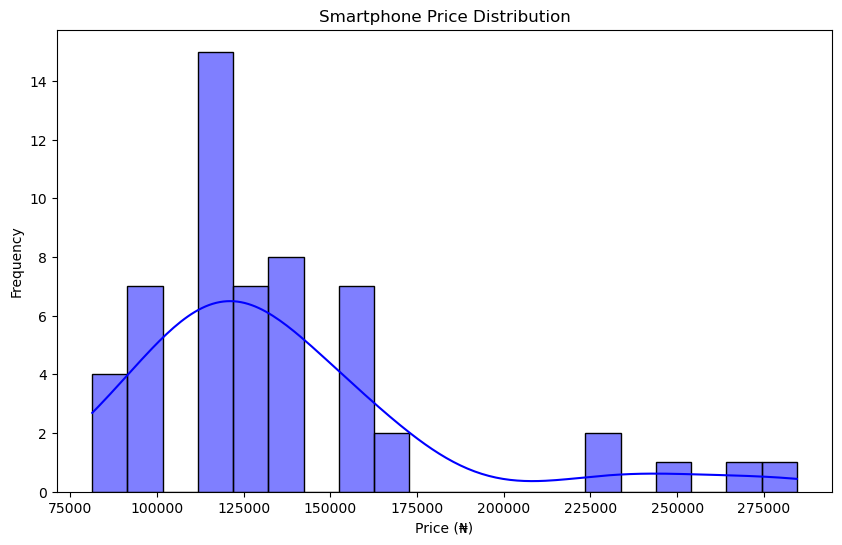

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='blue')
plt.title('Smartphone Price Distribution')
plt.xlabel('Price (₦)')
plt.ylabel('Frequency')
plt.show()

In [27]:
min_price = df['Price'].min()
max_price = df['Price'].max()
median_price = df['Price'].median()

print(f"Min Price: ₦ {min_price:,.2f}")
print(f"Max Price: ₦ {max_price:,.2f}")
print(f"Median Price: ₦ {median_price:,.2f}")

Min Price: ₦ 81,299.00
Max Price: ₦ 284,501.00
Median Price: ₦ 125,712.00


             Name Length     Price
Name Length     1.000000  0.186238
Price           0.186238  1.000000


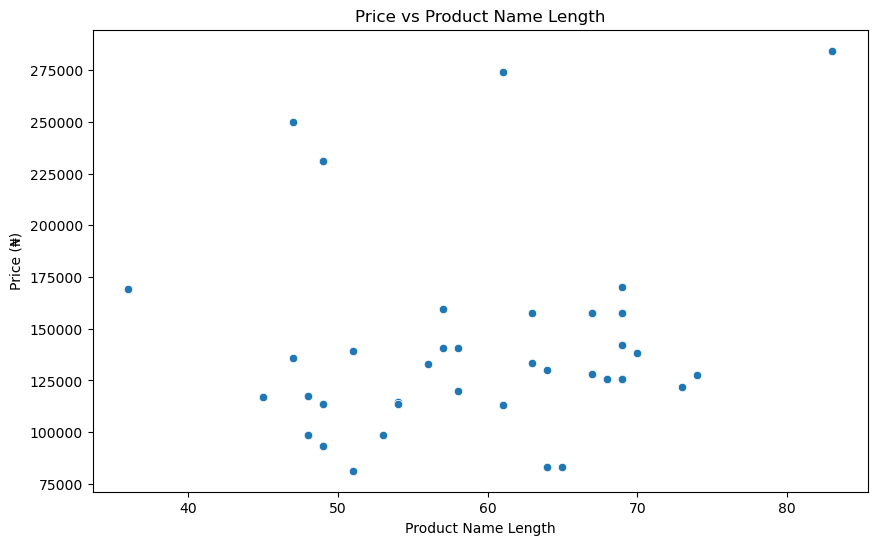

In [29]:
df['Name Length'] = df['Product Name'].apply(len)

# Correlation between Name Length and Price
correlation = df[['Name Length', 'Price']].corr()
print(correlation)

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Name Length', y='Price')
plt.title('Price vs Product Name Length')
plt.xlabel('Product Name Length')
plt.ylabel('Price (₦)')
plt.show()

In [31]:
top_5_expensive = df.nlargest(5, 'Price')
print("Top 5 Most Expensive Phones:")
print(top_5_expensive[['Product Name', 'Price']])

Top 5 Most Expensive Phones:
                                         Product Name   Price
41  XIAOMI Redmi Note 14 6.67" 8GB RAM/256 GB ROM ...  284501
47  Infinix Hot 50 Pro+ 6.78" 8GB RAM/128GB ROM An...  274226
49    Realme C75 Dual SIM Lightning Gold 8GB 256GB 4G  249900
7   itel S25 Ultra 6.78" AMOLED 256+8 4G Android-Blue  231300
22  itel S25 Ultra 6.78" AMOLED 256+8 4G Android-Blue  231300


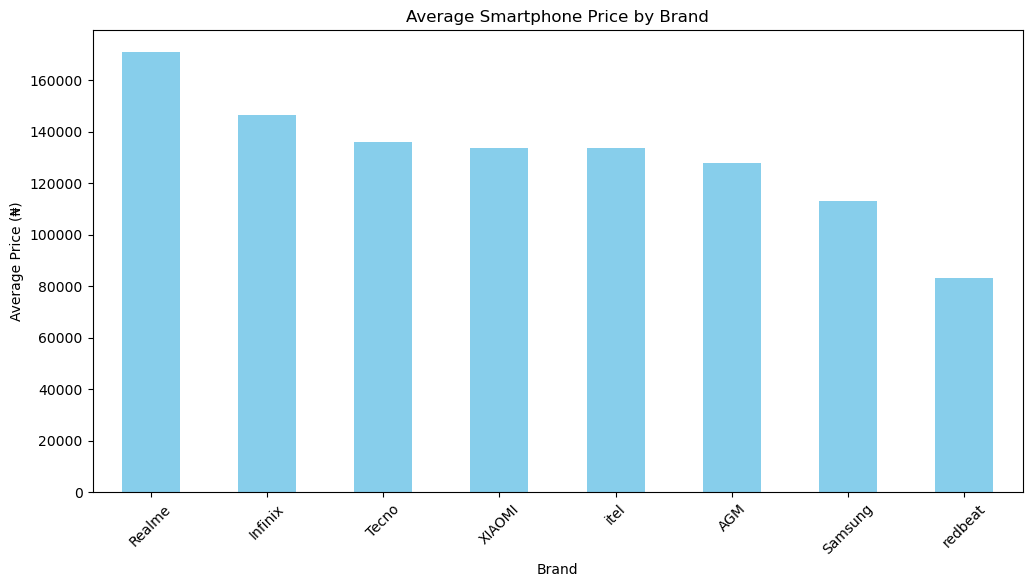

In [33]:
df['Brand'] = df['Product Name'].apply(lambda x: x.split()[0])  # Assume the first word is the brand
brand_prices = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Plot average prices by brand
plt.figure(figsize=(12, 6))
brand_prices.plot(kind='bar', color='skyblue')
plt.title('Average Smartphone Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (₦)')
plt.xticks(rotation=45)
plt.show()

C:\Users\seanm\AppData\Local\Temp\ipykernel_16000\3627976300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price Category', data=df, palette='Set2')


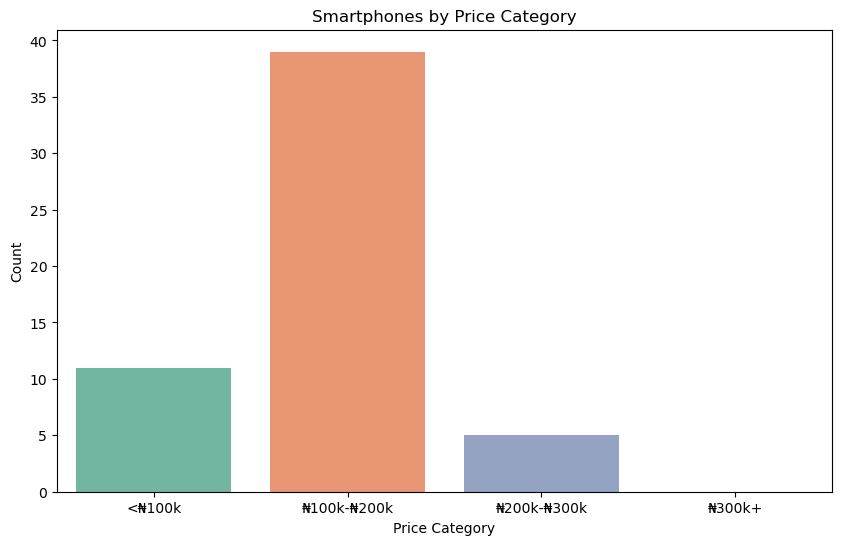

In [35]:
# Define price categories
bins = [0, 100000, 200000, 300000, float('inf')]
labels = ['<₦100k', '₦100k-₦200k', '₦200k-₦300k', '₦300k+']
df['Price Category'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Plot distribution of phones across categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Category', data=df, palette='Set2')
plt.title('Smartphones by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()